In [5]:
import open3d as o3d

# 점군 데이터 불러오기
pcd = o3d.io.read_point_cloud("testImage/1.ply")

# 점군 데이터 시각화
o3d.visualization.draw_geometries([pcd])

# # 3D 메쉬 데이터 불러오기
# mesh = o3d.io.read_triangle_mesh("testImage/1.ply")

# # 3D 메쉬 데이터 시각화
# o3d.visualization.draw_geometries([mesh])

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[Open3D WARNING] Read PLY failed: unable to open file: testImage/1.ply


In [2]:
!pip install ultralytics


  Obtaining dependency information for ultralytics from https://files.pythonhosted.org/packages/36/f8/6dc32d37160695f8c6909ae6acecb39c28447001c52ffe9c216c37d17ec8/ultralytics-8.0.163-py3-none-any.whl.metadata
  Using cached ultralytics-8.0.163-py3-none-any.whl.metadata (28 kB)
  Obtaining dependency information for matplotlib>=3.2.2 from https://files.pythonhosted.org/packages/c9/46/6cbaf20f5bd0e7c1d204b45b853c2cd317b303fada90245f2825ecca47de/matplotlib-3.7.2-cp39-cp39-win_amd64.whl.metadata
  Using cached matplotlib-3.7.2-cp39-cp39-win_amd64.whl.metadata (5.8 kB)
  Using cached torch-2.0.1-cp39-cp39-win_amd64.whl (172.4 MB)
  Using cached torchvision-0.15.2-cp39-cp39-win_amd64.whl (1.2 MB)
  Obtaining dependency information for pandas>=1.1.4 from https://files.pythonhosted.org/packages/9a/f2/0ad053856debbe90c83de1b4f05915f85fd2146f20faf9daa3b320d36df3/pandas-2.0.3-cp39-cp39-win_amd64.whl.metadata
  Using cached pandas-2.0.3-cp39-cp39-win_amd64.whl.metadata (18 kB)
  Using cached seabo

In [3]:
 !nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Tue_May__3_19:00:59_Pacific_Daylight_Time_2022
Cuda compilation tools, release 11.7, V11.7.64
Build cuda_11.7.r11.7/compiler.31294372_0


In [4]:
!nvidia-smi

Sun Aug 27 04:55:44 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 537.13                 Driver Version: 537.13       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1060 ...  WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   54C    P8               6W /  60W |   1046MiB /  6144MiB |     20%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://download.pytorch.org/whl/cu117


In [2]:

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.163  Python-3.9.13 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce GTX 1060 with Max-Q Design, 6144MiB)
Setup complete  (8 CPUs, 15.9 GB RAM, 253.8/465.1 GB disk)


In [9]:
!pip uninstall torch

^C


In [13]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.6594, 0.0036, 0.2321],
        [0.7232, 0.8981, 0.2974],
        [0.4254, 0.1999, 0.1519],
        [0.7252, 0.1263, 0.0947],
        [0.9799, 0.1189, 0.1232]])


In [12]:
import torch
torch.cuda.is_available()

False

In [34]:
boundaries = {}  # 클래스 번호와 좌표 정보를 저장할 딕셔너리

with open("runs/segment/predict8/labels/1_Color.txt", "r") as file:
    lines = file.readlines()
    for line in lines:
        data = line.strip().split()
        class_number = int(data[0])
        coords = [(float(data[i]), float(data[i+1])) for i in range(1, len(data), 2)]
        if class_number not in boundaries :
            boundaries [class_number] = []
        boundaries [class_number].append(coords)

In [38]:
boundaries

{1: [[(0.584135, 0.474359),
   (0.581731, 0.477564),
   (0.579327, 0.477564),
   (0.574519, 0.483974),
   (0.572115, 0.483974),
   (0.569712, 0.487179),
   (0.567308, 0.487179),
   (0.564904, 0.490385),
   (0.5625, 0.490385),
   (0.560096, 0.49359),
   (0.560096, 0.496795),
   (0.557692, 0.5),
   (0.557692, 0.503205),
   (0.548077, 0.516026),
   (0.548077, 0.528846),
   (0.538462, 0.541667),
   (0.538462, 0.557692),
   (0.53125, 0.567308),
   (0.53125, 0.573718),
   (0.528846, 0.576923),
   (0.528846, 0.596154),
   (0.540865, 0.61218),
   (0.552885, 0.61218),
   (0.5625, 0.625),
   (0.581731, 0.625),
   (0.586538, 0.63141),
   (0.586538, 0.634615),
   (0.588942, 0.637821),
   (0.603365, 0.637821),
   (0.605769, 0.641026),
   (0.608173, 0.641026),
   (0.615385, 0.650641),
   (0.629808, 0.650641),
   (0.637019, 0.660256),
   (0.641827, 0.660256),
   (0.644231, 0.663462),
   (0.658654, 0.663462),
   (0.668269, 0.676282),
   (0.685096, 0.676282),
   (0.694712, 0.689103),
   (0.716346, 0.68

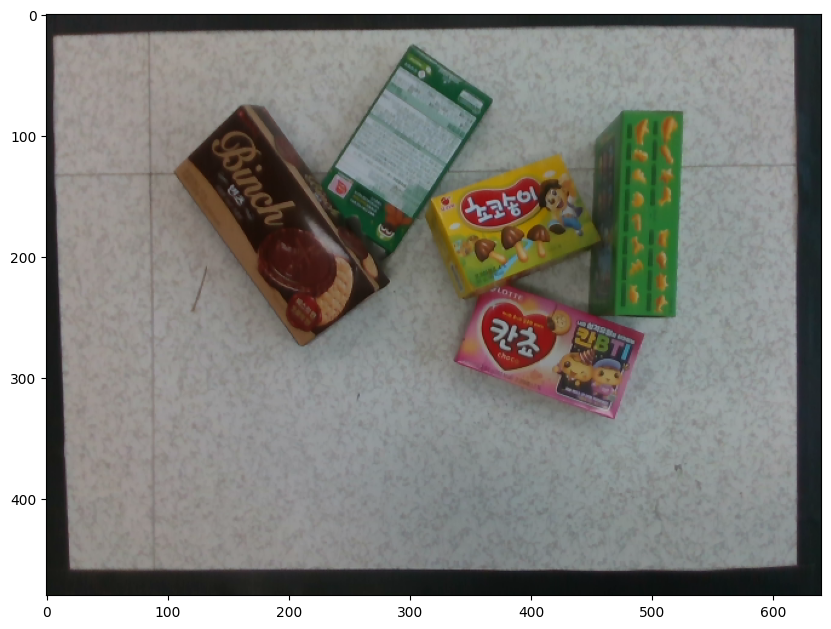

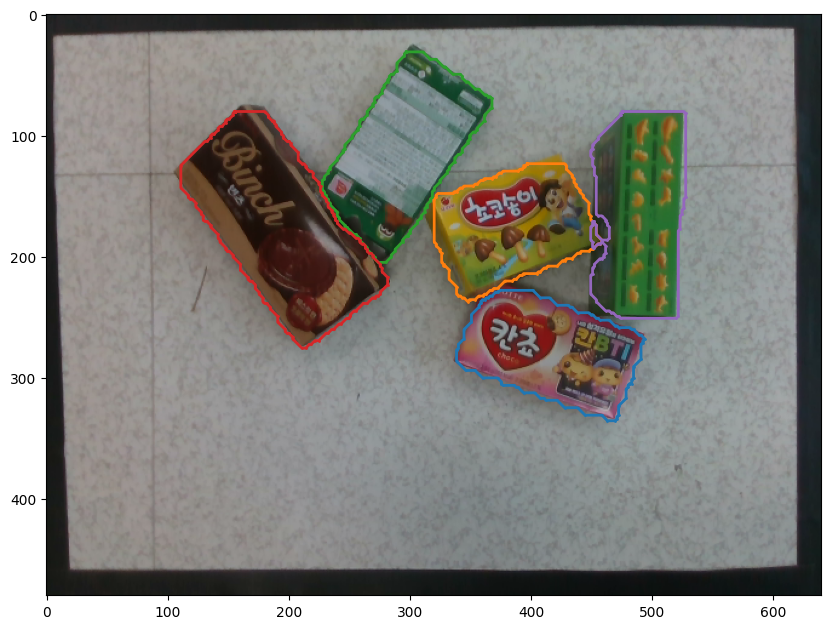

In [44]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# 경계 정보를 읽어옴 (이미 작성한 코드와 동일)
# boundaries 딕셔너리에 클래스 번호와 좌표 정보가 저장되어 있다고 가정합니다.

# 원본 이미지 로드
image_path = "C:/MainProject_local/testImage/1_Color.png"  # 실제 이미지 경로로 변경
image = Image.open(image_path)

# 이미지 및 경계 표시 설정
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(image)

# 이미지의 크기 정보 (가로, 세로)
image_width = image.width
image_height = image.height

# 경계 정보의 좌표를 이미지의 좌표 체계로 변환하는 함수
def map_to_2d(x_3d, y_3d):
    x_2d = x_3d * image_width
    y_2d = y_3d * image_height
    return x_2d, y_2d

# 이미지 및 경계 표시 설정
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(image)

# 경계 표시
for class_number, boundary_coords in boundaries.items():
    for coords in boundary_coords:
        coords.append(coords[0])  # 경계를 닫기 위해 처음 좌표를 다시 추가
        
        # 경계 정보의 좌표를 이미지의 좌표 체계로 변환
        coords_2d = [map_to_2d(x, y) for x, y in coords]
        
        xs, ys = zip(*coords_2d)
        ax.plot(xs, ys, marker='o', markersize=1, linewidth=2)

plt.show()

In [29]:
import open3d as o3d
import numpy as np

# .ply 파일 로드
point_cloud = o3d.io.read_point_cloud("testImage/1.ply")

# 3D 점군 데이터를 numpy 배열로 변환
point_cloud_data = np.asarray(point_cloud.points)

# 클래스 번호와 좌표 정보를 저장할 딕셔너리
class_coords = {}

with open("runs/segment/predict8/labels/1_Color.txt", "r") as file:
    lines = file.readlines()
    for line in lines:
        data = line.strip().split()
        class_number = int(data[0])
        coords = [(float(data[i]), float(data[i+1])) for i in range(1, len(data), 2)]
        if class_number not in class_coords:
            class_coords[class_number] = []
        class_coords[class_number].append(coords)

def map_to_3d_x(x_2d):
    return x_2d * 0.01

def map_to_3d_y(y_2d):
    return y_2d * 0.01

# 클래스 번호에 따라 segmentation된 좌표 정보 추출 및 3D 공간에 매핑
segmented_point_cloud = []

for class_number, coords_list in class_coords.items():
    for coords_2d in coords_list:
        for coord_2d in coords_2d:
            x_2d, y_2d = coord_2d
            # 2D 이미지 좌표를 3D 공간으로 변환
            x_3d = map_to_3d_x(x_2d)
            y_3d = map_to_3d_y(y_2d)
            
            # Find the nearest 3D point in point_cloud_data
            closest_point_idx = np.argmin(np.linalg.norm(point_cloud_data[:, :2] - [x_3d, y_3d], axis=1))
            z_3d = point_cloud_data[closest_point_idx, 2]
            
            segmented_point_cloud.append([x_3d, y_3d, z_3d, class_number])

segmented_point_cloud = np.array(segmented_point_cloud)


In [32]:
import numpy as np
import open3d as o3d

# 2D 좌표를 3D 공간 좌표로 변환하는 함수
def map_to_3d(x_2d, y_2d):
    # 여기에 적절한 2D to 3D 좌표 변환 로직을 적용
    # 예시로는 간단하게 x, y 좌표를 그대로 사용하고 z 좌표는 0으로 설정
    return x_2d, y_2d, 0.0

# 경계 내에 있는 3D 클라우드 포인트를 추출하는 함수
def extract_segmented_points(point_cloud_data, boundary_coords_2d_list):
    segmented_points = []
    for boundary_coords_2d in boundary_coords_2d_list:
        for boundary_coord_2d in boundary_coords_2d:
            x_2d, y_2d = boundary_coord_2d
            x_3d, y_3d, z_3d = map_to_3d(x_2d, y_2d)

            # 해당 3D 좌표를 포인트 클라우드 데이터에서 찾아서 추출
            # 여기서는 가장 가까운 포인트를 추출하는 예시를 보여줍니다.
            closest_point_idx = np.argmin(np.linalg.norm(point_cloud_data[:, :2] - [x_3d, y_3d], axis=1))
            segmented_points.append(point_cloud_data[closest_point_idx])

    return np.array(segmented_points)

# 2D 이미지에서 분할된 객체의 경계 정보를 얻어온다고 가정
# boundaries는 분할된 객체들의 경계 정보를 담은 딕셔너리라고 가정
boundaries 

# 3D 클라우드 데이터를 가져온다고 가정

# point_cloud_data는 3D 클라우드 데이터의 numpy 배열이라고 가정
# 이 데이터는 Numpy 배열이며 각 행은 [x, y, z] 형식의 3D 좌표를 갖습니다.
segmented_point_cloud   


# 추출된 클라우드 포인트를 NumPy 배열로 변환
segmented_point_cloud = np.array(segmented_point_cloud)

# 3D 좌표 정보만 사용하여 포인트 클라우드 생성
point_cloud = o3d.geometry.PointCloud()
point_cloud.points = o3d.utility.Vector3dVector(segmented_point_cloud[:, :3])

# 시각화
o3d.visualization.draw_geometries([point_cloud])